#  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, Activation
from keras.utils import to_categorical
import os
import cv2

Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [2]:
#global variables
DATA_DIR = './Chess'
CATEGORIES = ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']
IMG_SIZE = 100

# Loading the data

In [3]:
data = []
for categories in CATEGORIES:
    path = os.path.join(DATA_DIR, categories)
    class_num = CATEGORIES.index(categories)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), 0)
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
            data.append([new_array, class_num])
        
        except Exception as e:
            pass
       
    

In [4]:
data

[[array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 254, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 246, 247, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[ 13,  13,  13, ...,  19,  19,  19],
         [ 13,  13,  13, ...,  19,  19,  19],
         [ 13,  13,  13, ...,  19,  20,  19],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 206,  26, 255],
         [255, 255, 255, ..., 253,  46, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  0],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 2

In [5]:
#shape of data
np.shape(data)

(555, 2)

# Breaking the data into features and labels

In [6]:
x = []
y = []

for feature, labels in data:
    x.append(feature)
    y.append(labels)

# Printing some features and thier labels

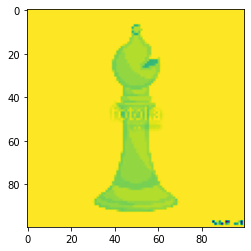

label :  0


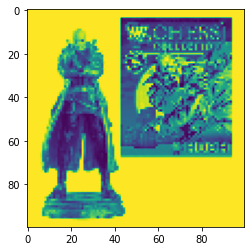

label :  3


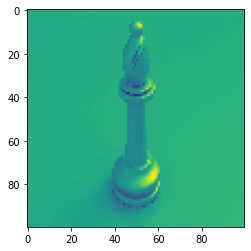

label :  0


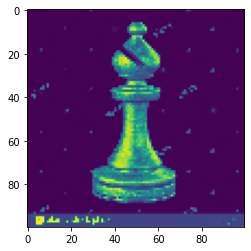

label :  0


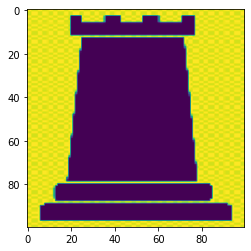

label :  5


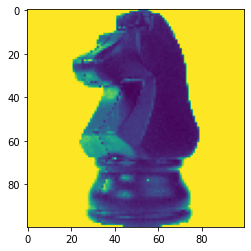

label :  2


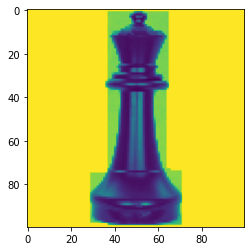

label :  4


In [7]:
index = [2,321,12,43,543,200,400]
for i in index:
    plt.imshow(x[i])
    plt.show()
    print('label : ', y[i])

# Converting labels to categorical data


In [8]:
y = to_categorical(y)

In [9]:
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

# Reshaping the features

In [10]:
x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

# Spliting the data into train and test

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

# CNN model

In [12]:
import keras
model = Sequential()
model.add(Conv2D(32, 3,activation='relu', data_format='channels_last', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(216))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Dense(6, activation='softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 216)               16595928  
_________________________________________________________________
dropout_1 (Dropout)          (None, 216)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1302      
_________________________________________________________________
dense_3 (Dense)              (None, 6)               

# Fitting the data

In [14]:
history = model.fit(x_train, y_train, epochs=50,validation_data=(x_test, y_test))

Train on 444 samples, validate on 111 samples
Epoch 1/50
444/444 [==============================] - 5s 12ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 183.7823 - val_accuracy: 0.3784
Epoch 2/50
444/444 [==============================] - 5s 12ms/step - loss: 0.0668 - accuracy: 0.9955 - val_loss: 189.1193 - val_accuracy: 0.3694
Epoch 3/50
444/444 [==============================] - 5s 12ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 190.4612 - val_accuracy: 0.3694
Epoch 4/50
444/444 [==============================] - 5s 12ms/step - loss: 0.0879 - accuracy: 0.9977 - val_loss: 184.0145 - val_accuracy: 0.4054
Epoch 5/50
444/444 [==============================] - 5s 12ms/step - loss: 0.1544 - accuracy: 0.9932 - val_loss: 188.5022 - val_accuracy: 0.3874
Epoch 6/50
444/444 [==============================] - 5s 12ms/step - loss: 0.0715 - accuracy: 0.9887 - val_loss: 183.8250 - val_accuracy: 0.3964
Epoch 7/50
444/444 [==============================] - 5s 12ms/step - loss: 0.3088 - 

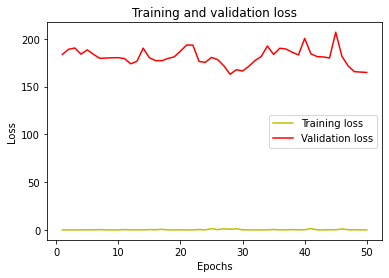

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

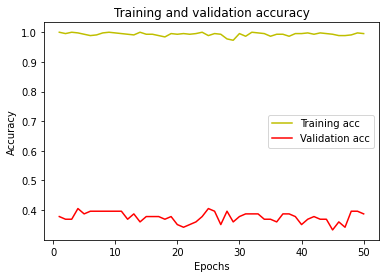

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()